In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
cnt= pd.read_csv("countries.csv")
cnt.head()

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
0,Afghanistan,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,64.83,0.498
1,Albania,2877800,104.871,38.0,13.188,8.643,11803.431,1.1,78.57,0.785
2,Algeria,43851043,17.348,29.1,6.211,3.857,13913.839,0.5,76.88,0.754
3,Andorra,77265,163.755,NaN,NaN,NaN,NaN,NaN,83.73,0.858
4,Angola,32866268,23.890,16.8,2.405,1.362,5819.495,NaN,61.15,0.581


In [25]:
cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 190 non-null    object 
 1   population               190 non-null    int64  
 2   population_density       186 non-null    float64
 3   median_age               181 non-null    float64
 4   aged_65_older            179 non-null    float64
 5   aged_70_older            180 non-null    float64
 6   gdp_per_capita           182 non-null    float64
 7   extreme_poverty          124 non-null    float64
 8   life_expectancy          189 non-null    float64
 9   human_development_index  183 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 15.0+ KB


<AxesSubplot:>

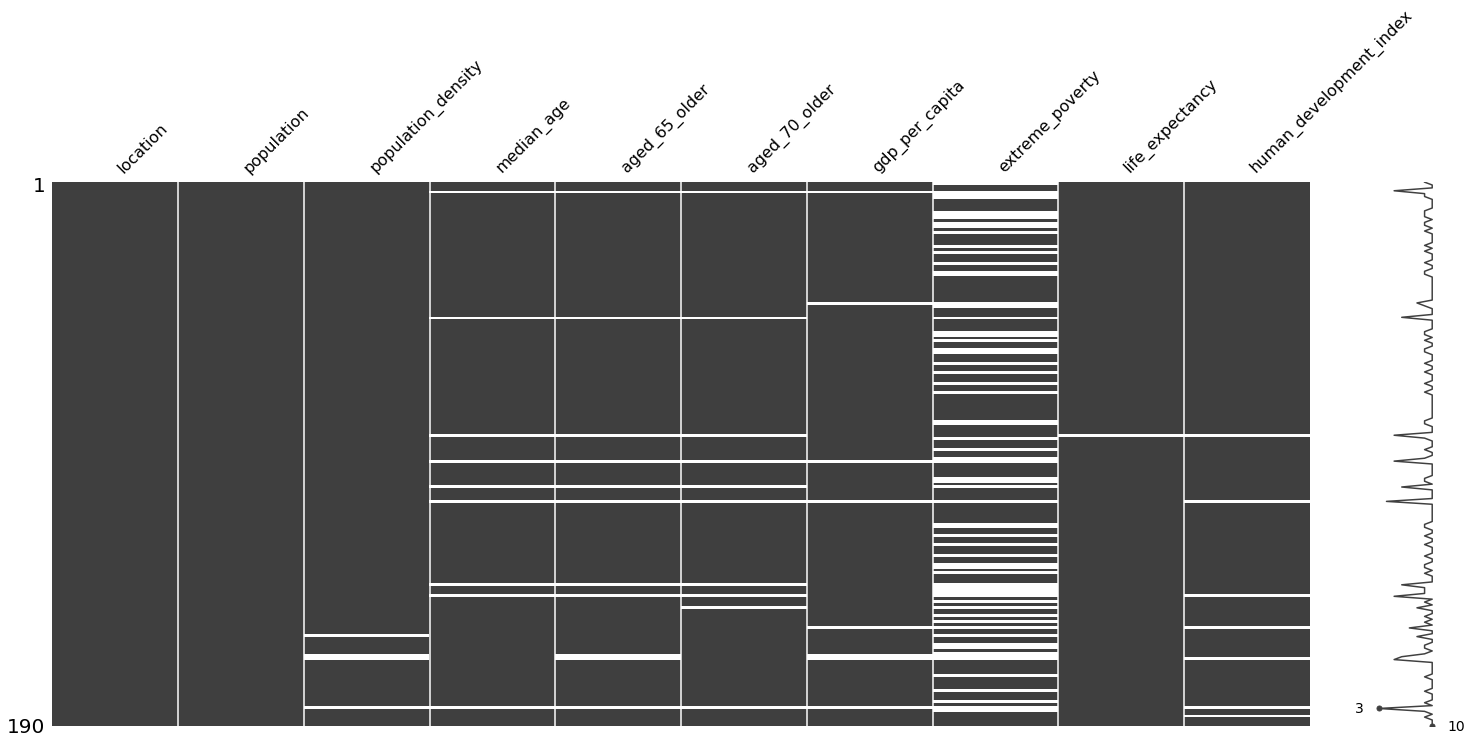

In [26]:
import missingno
missingno.matrix(cnt)

In [27]:
happy_score_cnt = pd.read_csv('happiness_scores.csv')
happy_score_cnt.head()

,location,happiness_score
0,Finland,7.809
1,Denmark,7.646
2,Switzerland,7.560
3,Iceland,7.504
4,Norway,7.488


In [28]:
df=pd.merge(cnt, happy_score_cnt, on="location", how="left")
df.head()

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
0,Afghanistan,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,64.83,0.498,2.567
1,Albania,2877800,104.871,38.0,13.188,8.643,11803.431,1.1,78.57,0.785,4.883
2,Algeria,43851043,17.348,29.1,6.211,3.857,13913.839,0.5,76.88,0.754,5.005
3,Andorra,77265,163.755,NaN,NaN,NaN,NaN,NaN,83.73,0.858,NaN
4,Angola,32866268,23.890,16.8,2.405,1.362,5819.495,NaN,61.15,0.581,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 190 non-null    object 
 1   population               190 non-null    int64  
 2   population_density       186 non-null    float64
 3   median_age               181 non-null    float64
 4   aged_65_older            179 non-null    float64
 5   aged_70_older            180 non-null    float64
 6   gdp_per_capita           182 non-null    float64
 7   extreme_poverty          124 non-null    float64
 8   life_expectancy          189 non-null    float64
 9   human_development_index  183 non-null    float64
 10  happiness_score          149 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 17.8+ KB


In [30]:
df.describe()

,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
count,1.900000e+02,186.000000,181.000000,179.000000,180.000000,182.000000,124.000000,189.000000,183.000000,149.000000
mean,8.183077e+07,341.658210,30.204972,8.590022,5.436161,18439.706637,13.916129,72.862011,0.708869,5.472221
std,5.819950e+08,1612.572496,9.171031,6.198639,4.225454,19589.091950,20.311975,7.584835,0.154410,1.125246
min,8.090000e+02,1.980000,15.100000,1.144000,0.526000,661.240000,0.100000,53.280000,0.354000,2.567000
25%,2.367885e+06,35.972500,21.700000,3.421500,2.033500,3924.303000,0.600000,67.270000,0.588500,4.677000
50%,9.493482e+06,82.464000,29.400000,6.211000,3.541500,11822.138500,2.350000,74.250000,0.736000,5.515000
75%,3.076120e+07,208.157000,38.700000,14.053000,8.651750,26069.050500,21.675000,77.970000,0.823000,6.258000
max,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,86.750000,0.953000,7.809000


In [31]:
df[(df["population"] < 1000) | (df["population"] > 1000000000) | (df["population_density"] > 15000)]

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
35,China,1439323774,147.674,38.7,10.641,5.929,15308.712,0.7,76.91,0.752,5.124
76,India,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,69.66,0.640,3.573
111,Monaco,39244,19347.500,NaN,NaN,NaN,NaN,NaN,86.75,NaN,NaN
183,Vatican,809,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN,NaN
186,World,7794798729,58.045,30.9,8.696,5.355,15469.207,10.0,72.58,NaN,NaN


In [32]:
df[(df["gdp_per_capita"] < 1000) | (df["extreme_poverty"] > 70)]

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
27,Burundi,11890781,423.062,17.5,2.562,1.504,702.225,71.7,61.58,0.417,3.775
32,Central African Republic,4829764,7.479,18.3,3.655,2.251,661.240,NaN,53.28,0.367,3.476
44,Democratic Republic of Congo,89561404,35.879,17.0,3.020,1.745,808.133,77.1,60.68,0.457,5.194
95,Liberia,5057677,49.127,19.2,3.057,1.756,752.788,38.6,64.10,0.435,4.558
100,Madagascar,27691019,43.951,19.6,2.929,1.686,1416.440,77.6,67.04,0.519,4.166
101,Malawi,19129955,197.519,18.1,2.979,1.783,1095.042,71.4,64.26,0.477,3.538
122,Niger,24206636,16.955,15.1,2.553,1.378,926.000,44.5,62.42,0.354,4.910


In [33]:
df.set_index("location", inplace=True)

In [34]:
df.head()

,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
location,,,,,,,,,,
Afghanistan,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,64.83,0.498,2.567
Albania,2877800,104.871,38.0,13.188,8.643,11803.431,1.1,78.57,0.785,4.883
Algeria,43851043,17.348,29.1,6.211,3.857,13913.839,0.5,76.88,0.754,5.005
Andorra,77265,163.755,NaN,NaN,NaN,NaN,NaN,83.73,0.858,NaN
Angola,32866268,23.890,16.8,2.405,1.362,5819.495,NaN,61.15,0.581,NaN


In [35]:
#sns.pairplot(df)

In [36]:
cnt_new = df[["median_age", "aged_65_older", "gdp_per_capita", "extreme_poverty", "life_expectancy", "human_development_index", "happiness_score"]]
cnt_new.sample(10)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
location,,,,,,,
Sierra Leone,19.1,2.538,1390.300,52.2,54.70,0.419,3.926
Austria,44.4,19.202,45436.686,0.7,81.54,0.908,7.294
Djibouti,25.4,4.213,2705.406,22.5,67.11,0.476,NaN
Slovenia,44.5,19.062,31400.840,NaN,81.32,0.896,6.363
Seychelles,36.2,8.606,26382.287,1.1,73.40,0.797,NaN
Zambia,17.7,2.480,3689.251,57.5,63.89,0.588,3.759
Barbados,39.8,14.952,16978.068,NaN,79.19,0.800,NaN
Tunisia,32.7,8.001,10849.297,2.0,76.70,0.735,4.392
Benin,18.8,3.244,2064.236,49.6,61.77,0.515,5.216


In [37]:
cnt_new.isnull().sum()

median_age                  9
aged_65_older              11
gdp_per_capita              8
extreme_poverty            66
life_expectancy             1
human_development_index     7
happiness_score            41
dtype: int64

In [38]:
for col in ["median_age", "aged_65_older", "life_expectancy"]:
    cnt_new[col].fillna(cnt_new[col]['World'], inplace=True)
cnt_new.isnull().sum()

D:\Anaconda belgeler\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


median_age                  0
aged_65_older               0
gdp_per_capita              8
extreme_poverty            66
life_expectancy             0
human_development_index     7
happiness_score            41
dtype: int64

In [39]:
cnt_new['human_development_index'].fillna(cnt_new['human_development_index'].mean(), inplace=True)
cnt_new.isnull().sum()

median_age                  0
aged_65_older               0
gdp_per_capita              8
extreme_poverty            66
life_expectancy             0
human_development_index     0
happiness_score            41
dtype: int64

In [40]:
cnt_new[cnt_new["extreme_poverty"].isnull()].sample(20)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
location,,,,,,,
Qatar,31.9,1.307,116935.600,NaN,80.23,0.856000,NaN
Dominica,30.9,8.696,9673.367,NaN,75.00,0.715000,NaN
Kuwait,33.7,2.345,65530.537,NaN,75.49,0.803000,6.102
Maldives,30.6,4.120,15183.616,NaN,78.92,0.717000,5.198
Sudan,19.7,3.548,4466.507,NaN,65.31,0.502000,NaN
Slovenia,44.5,19.062,31400.840,NaN,81.32,0.896000,6.363
Saudi Arabia,31.9,3.295,49045.411,NaN,75.13,0.853000,6.406
Syria,21.7,8.696,NaN,NaN,72.70,0.536000,NaN
Central African Republic,18.3,3.655,661.240,NaN,53.28,0.367000,3.476


In [41]:
cnt_new.corr()["extreme_poverty"].sort_values(ascending = False)

extreme_poverty            1.000000
gdp_per_capita            -0.507473
aged_65_older             -0.573485
happiness_score           -0.600319
median_age                -0.697723
life_expectancy           -0.751798
human_development_index   -0.769612
Name: extreme_poverty, dtype: float64

In [42]:
cnt_new.corr()["gdp_per_capita"].sort_values(ascending = False)

gdp_per_capita             1.000000
human_development_index    0.750823
happiness_score            0.727942
life_expectancy            0.673646
median_age                 0.639722
aged_65_older              0.500403
extreme_poverty           -0.507473
Name: gdp_per_capita, dtype: float64

In [43]:
from sklearn.cluster import KMeans

In [44]:
cnt_hdi = cnt_new["human_development_index"].values.reshape(-1, 1)

D:\Anaconda belgeler\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


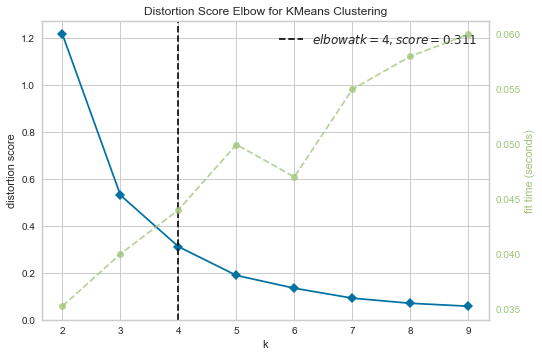

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 10))
visu.fit(cnt_hdi)
visu.poof()

In [46]:
kmeans_model = KMeans(n_clusters=4).fit(cnt_hdi)

In [47]:
cnt_hdi_pred = kmeans_model.predict(cnt_hdi)
print(cnt_hdi_pred)

[3 2 2 0 1 2 0 2 0 0 2 2 0 1 2 2 0 2 3 1 2 2 2 2 0 2 3 3 1 1 0 1 3 3 0 2 2
 3 1 2 3 0 2 0 3 0 3 2 2 2 2 2 1 3 0 1 3 2 0 0 2 3 2 0 1 0 2 1 3 3 1 3 1 0
 0 0 1 2 2 2 0 0 0 2 0 2 2 1 2 2 2 1 0 2 3 3 2 0 0 0 3 3 2 2 3 0 2 3 2 2 2
 2 2 2 1 3 1 1 1 0 0 1 3 1 2 0 0 1 2 2 1 2 2 2 0 0 0 2 2 3 2 2 2 2 2 1 0 3
 2 2 3 0 0 0 1 2 2 0 3 0 2 3 2 0 0 1 2 1 1 2 1 3 2 2 2 3 2 0 0 0 2 2 1 2 2
 2 2 3 1 1]


In [48]:
np.unique(cnt_hdi_pred, return_counts=True)

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]), array([47, 33, 78, 32], dtype=int64))

In [49]:
cnt_new["hdi_clusters"] = cnt_hdi_pred
cnt_new.head()

D:\Anaconda belgeler\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,hdi_clusters
location,,,,,,,,
Afghanistan,18.6,2.581,1803.987,NaN,64.83,0.498,2.567,3
Albania,38.0,13.188,11803.431,1.1,78.57,0.785,4.883,2
Algeria,29.1,6.211,13913.839,0.5,76.88,0.754,5.005,2
Andorra,30.9,8.696,NaN,NaN,83.73,0.858,NaN,0
Angola,16.8,2.405,5819.495,NaN,61.15,0.581,NaN,1


In [50]:
hdi_avg_hs = cnt_new.groupby("hdi_clusters")["happiness_score"].mean()
hdi_avg_hs

hdi_clusters
0    6.659643
1    4.803864
2    5.464138
3    4.187074
Name: happiness_score, dtype: float64

In [51]:
cnt_new["happiness_score"] = cnt_new.groupby("hdi_clusters")["happiness_score"].apply(lambda x: x.fillna(x.mean()))
cnt_new.head()

D:\Anaconda belgeler\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,hdi_clusters
location,,,,,,,,
Afghanistan,18.6,2.581,1803.987,NaN,64.83,0.498,2.567000,3
Albania,38.0,13.188,11803.431,1.1,78.57,0.785,4.883000,2
Algeria,29.1,6.211,13913.839,0.5,76.88,0.754,5.005000,2
Andorra,30.9,8.696,NaN,NaN,83.73,0.858,6.659643,0
Angola,16.8,2.405,5819.495,NaN,61.15,0.581,4.803864,1


In [52]:
cnt_new.isnull().sum()

median_age                  0
aged_65_older               0
gdp_per_capita              8
extreme_poverty            66
life_expectancy             0
human_development_index     0
happiness_score             0
hdi_clusters                0
dtype: int64

In [53]:
cnt_new["gdp_per_capita"] = cnt_new.groupby("hdi_clusters")["gdp_per_capita"].apply(lambda x: x.fillna(x.mean()))
cnt_new["gdp_per_capita"] = cnt_new["gdp_per_capita"].fillna(cnt_new["gdp_per_capita"].mean())
cnt_new.head()

D:\Anaconda belgeler\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda belgeler\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,hdi_clusters
location,,,,,,,,
Afghanistan,18.6,2.581,1803.987000,NaN,64.83,0.498,2.567000,3
Albania,38.0,13.188,11803.431000,1.1,78.57,0.785,4.883000,2
Algeria,29.1,6.211,13913.839000,0.5,76.88,0.754,5.005000,2
Andorra,30.9,8.696,44328.198822,NaN,83.73,0.858,6.659643,0
Angola,16.8,2.405,5819.495000,NaN,61.15,0.581,4.803864,1


In [54]:
hdi_avg_pvrty = cnt_new.groupby("hdi_clusters")["extreme_poverty"].mean()        
hdi_avg_pvrty

hdi_clusters
0     0.607407
1    19.633333
2     2.331915
3    43.400000
Name: extreme_poverty, dtype: float64

In [55]:
cnt_new["extreme_poverty"] = cnt_new.groupby("hdi_clusters")["extreme_poverty"].apply(lambda x: x.fillna(x.mean()))
cnt_new["extreme_poverty"] = cnt_new["extreme_poverty"].fillna(cnt_new["extreme_poverty"].mean())

D:\Anaconda belgeler\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda belgeler\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
cnt_new.isnull().sum()

median_age                 0
aged_65_older              0
gdp_per_capita             0
extreme_poverty            0
life_expectancy            0
human_development_index    0
happiness_score            0
hdi_clusters               0
dtype: int64

In [57]:
cnt_new.drop("hdi_clusters", axis=1, inplace=True)

D:\Anaconda belgeler\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale
hopkins(cnt_new, cnt_new.shape[0])

0.16469194484220295

In [60]:
hopkins(scale(cnt_new), cnt_new.shape[0])

0.1408754408568533

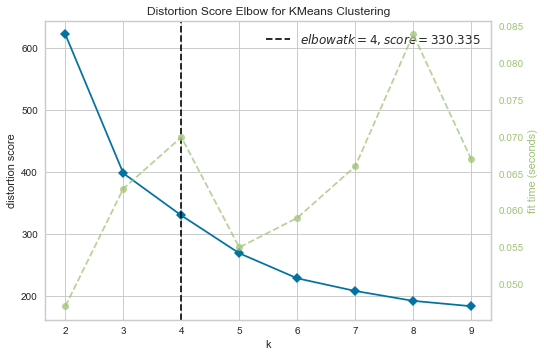

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 10))
visu.fit(scale(cnt_new))
visu.poof()

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cnt_new)
cnt_new_scaled = scaler.transform(cnt_new)

In [63]:
kmeans_model = KMeans(n_clusters=4, random_state=18).fit(cnt_new_scaled)

In [64]:
cnt_new1_scaled_pred = kmeans_model.predict(cnt_new_scaled)
print(cnt_new1_scaled_pred)

[1 0 0 3 1 0 0 0 2 2 0 0 3 0 2 2 2 0 1 0 0 2 0 0 3 2 1 1 0 1 2 0 1 1 2 0 0
 1 1 0 1 2 2 2 1 2 1 0 0 0 0 0 1 1 2 1 1 0 2 2 0 1 0 2 1 2 0 0 1 1 0 1 0 2
 2 2 1 0 0 0 3 2 2 0 2 0 0 1 0 3 0 1 2 0 1 1 0 3 2 3 1 1 0 0 1 2 0 1 0 0 0
 0 0 2 0 1 0 1 0 2 2 0 1 1 0 2 3 0 0 0 1 0 0 0 2 2 3 2 2 1 0 0 0 0 3 1 3 1
 2 0 1 3 2 2 1 0 0 2 1 2 0 1 0 2 2 0 0 0 1 0 1 1 0 0 0 1 0 3 2 2 2 0 0 0 0
 0 0 1 1 1]


In [65]:
np.unique(cnt_new1_scaled_pred, return_counts=True)

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]), array([82, 50, 45, 13], dtype=int64))

In [66]:
from sklearn.metrics import silhouette_score

In [67]:
silhouette_score(cnt_new_scaled, cnt_new1_scaled_pred)

0.4034302709507013

In [68]:
cnt_new['Kmeans_clusters'] = cnt_new1_scaled_pred
cnt_new.head()

D:\Anaconda belgeler\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,Kmeans_clusters
location,,,,,,,,
Afghanistan,18.6,2.581,1803.987000,43.400000,64.83,0.498,2.567000,1
Albania,38.0,13.188,11803.431000,1.100000,78.57,0.785,4.883000,0
Algeria,29.1,6.211,13913.839000,0.500000,76.88,0.754,5.005000,0
Andorra,30.9,8.696,44328.198822,0.607407,83.73,0.858,6.659643,3
Angola,16.8,2.405,5819.495000,19.633333,61.15,0.581,4.803864,1


In [70]:
cnt_new[cnt_new['Kmeans_clusters'] == 2].tail(20)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,Kmeans_clusters
location,,,,,,,,
Lithuania,43.5,19.002,29524.265,0.700000,75.93,0.858,6.215,2
Malta,42.4,19.426,36513.323,0.200000,82.53,0.878,6.773,2
Montenegro,39.1,14.762,16409.288,1.000000,76.88,0.814,5.546,2
Netherlands,43.2,18.779,48472.545,0.607407,82.28,0.931,7.449,2
New Zealand,37.9,15.322,36085.843,0.607407,82.29,0.917,7.300,2
Norway,39.7,16.821,64800.057,0.200000,82.40,0.953,7.488,2
Poland,41.8,16.763,27216.445,0.607407,78.73,0.865,6.186,2
Portugal,46.2,21.502,27936.896,0.500000,82.05,0.847,5.911,2
Romania,43.0,17.850,23313.199,5.700000,76.05,0.811,6.124,2


In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

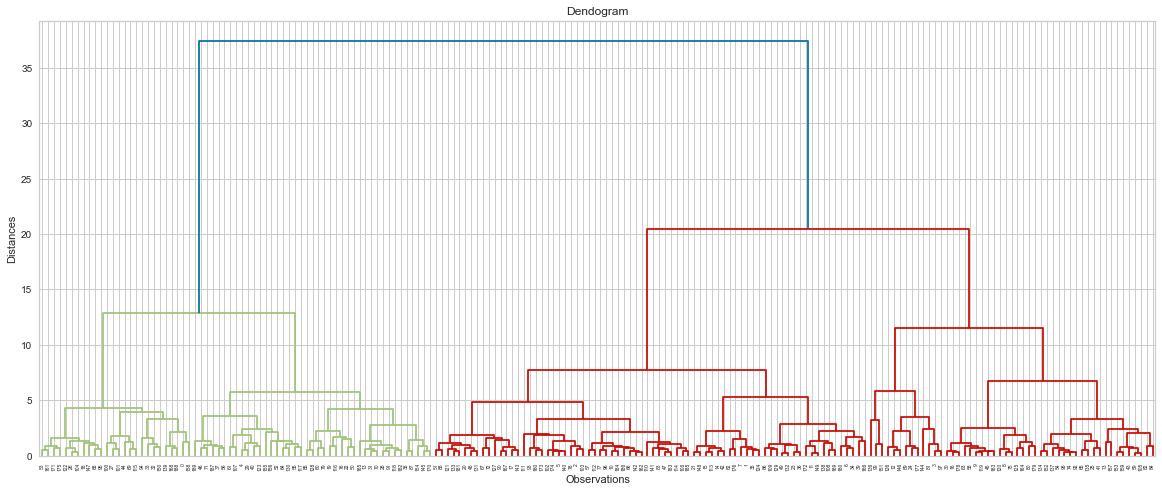

In [73]:
linked = linkage(cnt_new_scaled, "ward")
plt.figure(figsize = (20,8))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distances")
dendrogram(linked);

In [74]:
from sklearn.cluster import AgglomerativeClustering

In [77]:
Hr_model = AgglomerativeClustering (n_clusters = 4)
cnt_new_scaled_pred_hr = Hr_model.fit_predict(cnt_new_scaled)

In [78]:
clusters = Hr_model.labels_

In [79]:
np.unique(cnt_new_scaled_pred_hr, return_counts=True)

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3], dtype=int64), array([49, 41, 74, 26], dtype=int64))

In [81]:
silhouette_score(cnt_new_scaled, cnt_new_scaled_pred_hr)

0.3327971332064489

In [82]:
cnt_new["Hr_predicted_clusters"]=clusters

D:\Anaconda belgeler\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
cnt_new.head()

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,Kmeans_clusters,Hr_predicted_clusters
location,,,,,,,,,
Afghanistan,18.6,2.581,1803.987000,43.400000,64.83,0.498,2.567000,1,3
Albania,38.0,13.188,11803.431000,1.100000,78.57,0.785,4.883000,0,2
Algeria,29.1,6.211,13913.839000,0.500000,76.88,0.754,5.005000,0,2
Andorra,30.9,8.696,44328.198822,0.607407,83.73,0.858,6.659643,3,0
Angola,16.8,2.405,5819.495000,19.633333,61.15,0.581,4.803864,1,1


In [84]:
cnt_new[cnt_new['Kmeans_clusters'] == 3].index

Index(['Andorra', 'Bahrain', 'Brunei', 'Ireland', 'Kuwait', 'Liechtenstein',
       'Luxembourg', 'Oman', 'Qatar', 'San Marino', 'Saudi Arabia',
       'Singapore', 'United Arab Emirates'],
      dtype='object', name='location')

In [85]:
cnt_new[cnt_new['Hr_predicted_clusters'] == 1].index

Index(['Angola', 'Bangladesh', 'Bhutan', 'Botswana', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Comoros', 'Congo', 'Cote d'Ivoire', 'Djibouti', 'Egypt',
       'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
       'Guyana', 'Haiti', 'India', 'Iraq', 'Jordan', 'Kenya', 'Laos',
       'Mauritania', 'Myanmar', 'Namibia', 'Nepal', 'Nigeria', 'Palestine',
       'Papua New Guinea', 'Sao Tome and Principe', 'Solomon Islands',
       'Somalia', 'South Africa', 'Syria', 'Timor', 'Vanuatu', 'Yemen',
       'Zimbabwe'],
      dtype='object', name='location')

<IPython.core.display.Javascript object>

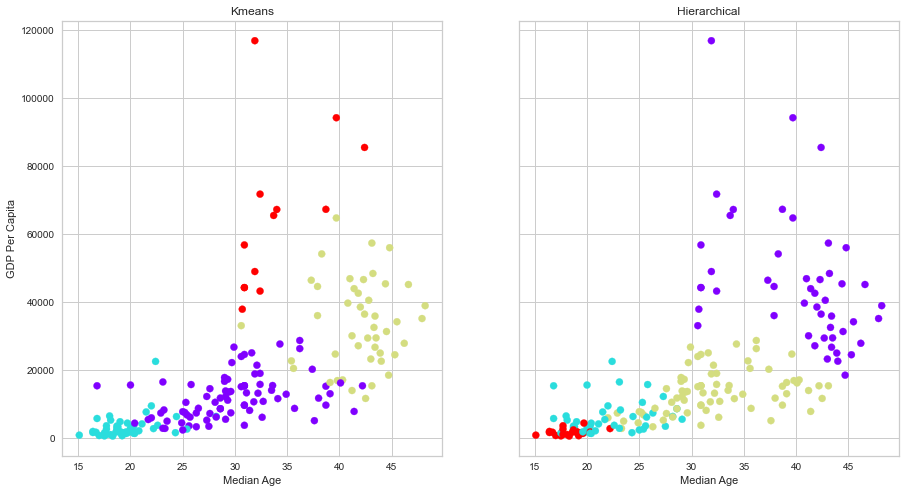

In [91]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,8))
ax1.set_title('Kmeans')
ax1.set_xlabel("Median Age")
ax1.set_ylabel("GDP Per Capita")
ax1.scatter(cnt_new.iloc[:,0], cnt_new.iloc[:,2], c = cnt_new["Kmeans_clusters"], s = 50, cmap = "rainbow")
ax2.set_title("Hierarchical")
ax2.set_xlabel("Median Age")
ax2.scatter(cnt_new.iloc[:,0], cnt_new.iloc[:,2], c = cnt_new["Hr_predicted_clusters"], s = 50, cmap = "rainbow")